## 1. 기계학습(50점)

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

### 1.1 시각화 포함 탐색적 자료분석을 시행하시오.

In [2]:
df = pd.read_csv('./ADP_book_ver01/data/diabetes_for_test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
print('결측치를 확인해 봤는데, 모든 변수에서 결측치가 발견되지는 않았다.')
print('종속 변수인 Outcome을 제외하고, 나머지 변수들은 모두 연속형 변수이다. 독립 변수들은 Boxplot으로 시각화하여 이상치를 확인하고, Outcome은 Barplot으로 클래스 별 비율을 확인한다.')

결측치를 확인해 봤는데, 모든 변수에서 결측치가 발견되지는 않았다.
종속 변수인 Outcome을 제외하고, 나머지 변수들은 모두 연속형 변수이다. 독립 변수들은 Boxplot으로 시각화하여 이상치를 확인하고, Outcome은 Barplot으로 클래스 별 비율을 확인한다.


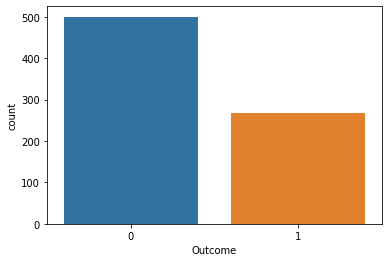

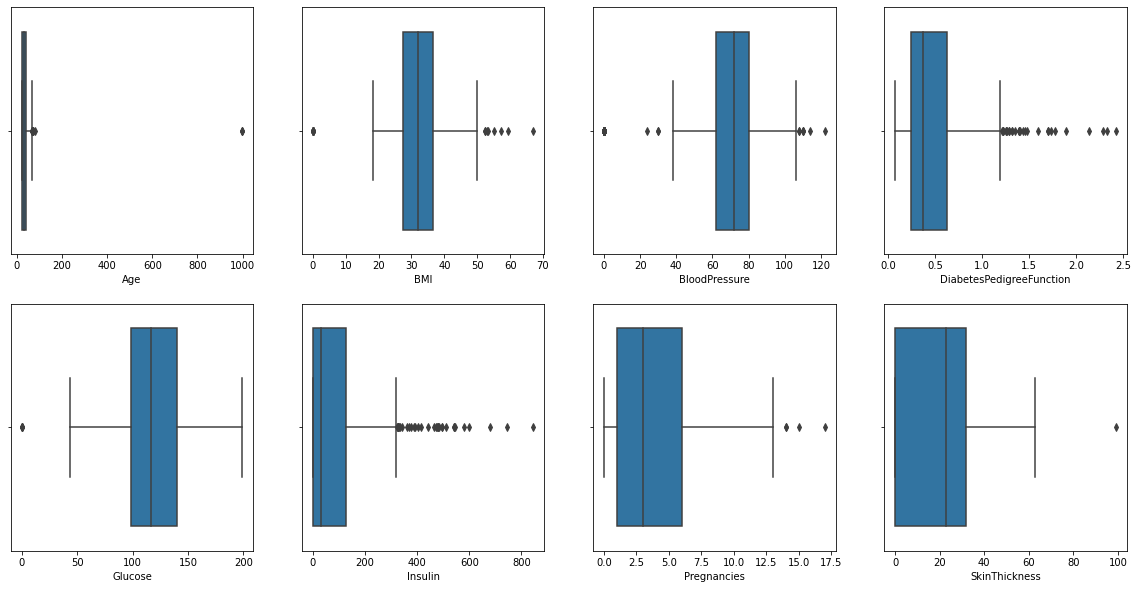

In [5]:
sns.countplot(x='Outcome', data=df)
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, col in enumerate(df.columns.difference(['Outcome'])):
    row_ = i//4
    col_ = i%4

    ax = axes[row_][col_]
    sns.boxplot(x=col, data=df, ax=ax)

종속 변수에 따른 독립변수들의 분포도 시각화 그래프로 보면, Outcome label에 따른 변수 분포의 차이를 확인할 수 있다.
당뇨가 있는 사람은 BMI 지수와 혈압, 포도당 수치, 인슐린 수치가 전반적으로 높아보인다.


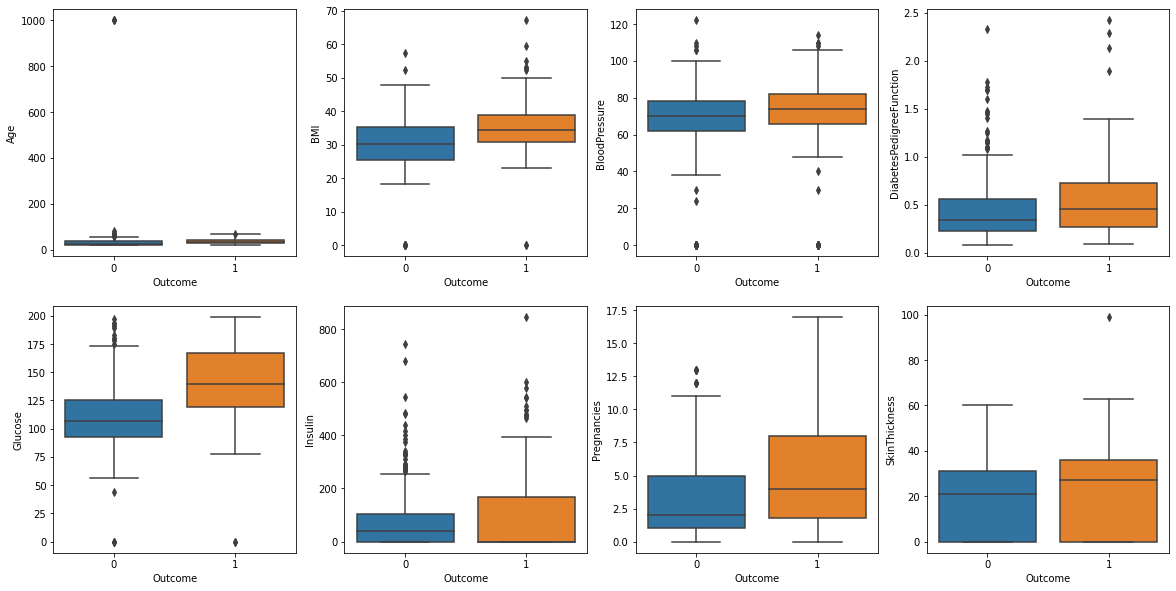

In [6]:
print('종속 변수에 따른 독립변수들의 분포도 시각화 그래프로 보면, Outcome label에 따른 변수 분포의 차이를 확인할 수 있다.')
print('당뇨가 있는 사람은 BMI 지수와 혈압, 포도당 수치, 인슐린 수치가 전반적으로 높아보인다.')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, col in enumerate(df.columns.difference(['Outcome'])):
    row_ = i//4
    col_ = i%4

    ax = axes[row_][col_]
    sns.boxplot(x='Outcome', y=col, data=df, ax=ax)

<AxesSubplot:>

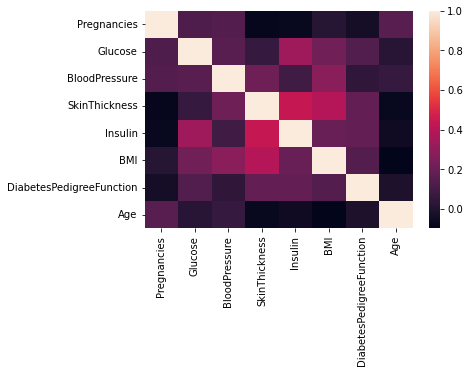

In [7]:
sns.heatmap(df.drop('Outcome', axis=1).corr())

In [8]:
print('또한, 연속형 독립변수들 간 상관 관계가 있는지 확인해 보기 위해 heatmap을 그려본 결과 일부 변수에서 선형 관계를 확인할 수 있었다. (Age와 Pregnancies, Insulin과 Glucose, Insulin과 SkinThickness, BMI와 SkinThickness)')

또한, 연속형 독립변수들 간 상관 관계가 있는지 확인해 보기 위해 heatmap을 그려본 결과 일부 변수에서 선형 관계를 확인할 수 있었다. (Age와 Pregnancies, Insulin과 Glucose, Insulin과 SkinThickness, BMI와 SkinThickness)


(2) 이상치를 식별하고 처리하시오. 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

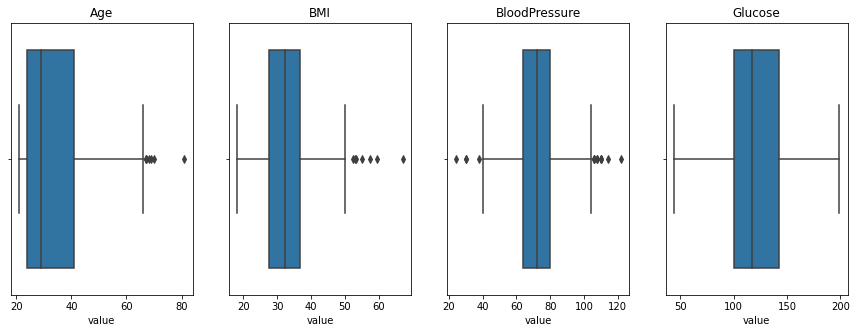

In [9]:
df = df[df.Age <=200]
df = df[df.BMI >=10]
df = df[df.BloodPressure >=10]
df = df[df.Glucose >=10]

fig, axes = plt.subplots(ncols=4, figsize=(15, 5))
for i, col in enumerate(['Age', 'BMI', 'BloodPressure', 'Glucose']):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_xlabel('value')
    axes[i].set_title(col)

In [10]:
print('Age에서 현실성이 떨어지는 이상치가 발견되었는데, 이는 데이터가 잘못 입력되었을 가능성이 높으며 제거가 필요하다. 이상치 제거 후, 비교적 안정적인 Boxplot을 확인할 수 있다.')
print('또한, BMI나 혈압 변수, 포도당 수치 변수는 신체 검사 측정치로, 0이 나올 수 없는 변수이다. 이 역시 이상치로 판단하고 제거한다.')

Age에서 현실성이 떨어지는 이상치가 발견되었는데, 이는 데이터가 잘못 입력되었을 가능성이 높으며 제거가 필요하다. 이상치 제거 후, 비교적 안정적인 Boxplot을 확인할 수 있다.
또한, BMI나 혈압 변수, 포도당 수치 변수는 신체 검사 측정치로, 0이 나올 수 없는 변수이다. 이 역시 이상치로 판단하고 제거한다.


In [11]:
print('다른 변수에서 발견된 이상치는 분석 시 특별한 의미를 가지고 있을 수도 있어 현업의 의견이 필요하다. 우선은 이상치의 영향을 줄이기 위해 로그 변환을 시행한다. 앞서 이상치 제거를 수행한 변수들 중, Glucose를 제외하고는 남은 이상치가 존재하므로, 같이 변환을 수행한다.')
log_col = df.columns.difference(['Outcome', 'Glucose'])
for col in log_col:
    df[col + '_log'] = np.log1p(df[col])

다른 변수에서 발견된 이상치는 분석 시 특별한 의미를 가지고 있을 수도 있어 현업의 의견이 필요하다. 우선은 이상치의 영향을 줄이기 위해 로그 변환을 시행한다. 앞서 이상치 제거를 수행한 변수들 중, Glucose를 제외하고는 남은 이상치가 존재하므로, 같이 변환을 수행한다.


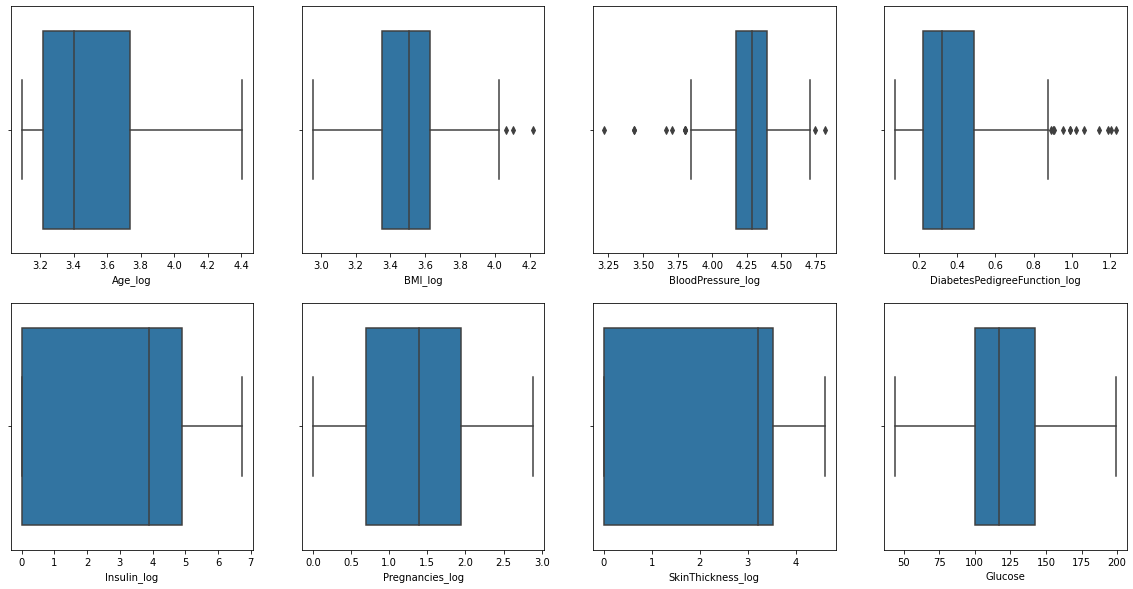

In [12]:
new_col = [col + '_log' for col in log_col] + ['Glucose']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, col in enumerate(new_col):
    row_ = i//4
    col_ = i%4

    ax = axes[row_][col_]
    sns.boxplot(x=col, data=df, ax=ax)

In [13]:
print('로그 변환 후, 대부분의 컬럼에서 이상치 개수가 줄어든 것을 확인할 수 있다.')

로그 변환 후, 대부분의 컬럼에서 이상치 개수가 줄어든 것을 확인할 수 있다.


#### 1.1.2. 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

In [14]:
print('독립 변수 간 상관성을 일부 확인할 수 있었는데, 이는 변수 선택 또는 차원 축소의 필요성을 시사한다.')
print('또한, 종속 변수 클래스의 불균형으로, 적은 숫자 클래스의 대표성이 떨어질 우려가 있다. 이를 해결하기 위한 샘플링 모델이 필요하다.')
print('그리고 각 변수의 측정 척도가 모두 다르므로, Scaling 작업 진행이 추가로 필요해 보인다.')

독립 변수 간 상관성을 일부 확인할 수 있었는데, 이는 변수 선택 또는 차원 축소의 필요성을 시사한다.
또한, 종속 변수 클래스의 불균형으로, 적은 숫자 클래스의 대표성이 떨어질 우려가 있다. 이를 해결하기 위한 샘플링 모델이 필요하다.
그리고 각 변수의 측정 척도가 모두 다르므로, Scaling 작업 진행이 추가로 필요해 보인다.


In [15]:
print('독립변수와 종속변수, train과 test set을 나누고 앞서 언급한 Scaling을 독립변수에 적용한다. 이상치가 있는 데이터이므로, 이상치에 민감하지 않은 RobustScaler를 사용한다.')

독립변수와 종속변수, train과 test set을 나누고 앞서 언급한 Scaling을 독립변수에 적용한다. 이상치가 있는 데이터이므로, 이상치에 민감하지 않은 RobustScaler를 사용한다.


In [16]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [60]:
x = df.loc[:, new_col]
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 1.2 클래스 불균형을 처리하시오.

In [61]:
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#### 1.2.1. 업 샘플링 과정 설명하고 결과 작성

In [62]:
print('Over-sampling(Up-sampling)은 소수 클래스의 데이터를 다수 클래스의 데이터 개수에 맞출 수 있도록 데이터를 늘리는 작업이다. 데이터가 늘어나게 되어 대체적으로는 성능에 유리하나, Overfitting의 가능성도 높아지기에 주의가 필요하다.')
print('보다 더 높은 성능을 위해 단순히 데이터를 복원추출하는 단순 오버샘플링 보다는, K-NN 알고리즘을 이용하여 소수 클래스 값 사이에 데이터를 생성해 주는 SMOTE 기법을 사용한다.')
print('SMOTE를 적용한 결과, 각 클래스의 데이터 개수가 378건으로 구성된 train set이 생성되었다.')

Over-sampling(Up-sampling)은 소수 클래스의 데이터를 다수 클래스의 데이터 개수에 맞출 수 있도록 데이터를 늘리는 작업이다. 데이터가 늘어나게 되어 대체적으로는 성능에 유리하나, Overfitting의 가능성도 높아지기에 주의가 필요하다.
보다 더 높은 성능을 위해 단순히 데이터를 복원추출하는 단순 오버샘플링 보다는, K-NN 알고리즘을 이용하여 소수 클래스 값 사이에 데이터를 생성해 주는 SMOTE 기법을 사용한다.
SMOTE를 적용한 결과, 각 클래스의 데이터 개수가 378건으로 구성된 train set이 생성되었다.


In [63]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)
print(Counter(y_smote))

Counter({0: 378, 1: 378})


#### 1.2.2 언더 샘플링 과정 설명하고 결과 작성

In [64]:
print('Under-sampling은 다수 클래스의 데이터 중 일부를 삭제하여, 소수 클래스의 데이터 개수에 맞추는 작업니다. 모델링 속도가 빨라지고, Overfitting에서 비교적 자유로운 장점은 있지만, 데이터 개수 감소로 인한 성능 저하에 유의해야 한다.')
print('Random under sampling을 적용한 결과, 각 클래스의 데이터 개수가 199건인 train set이 생성되었다.')

Under-sampling은 다수 클래스의 데이터 중 일부를 삭제하여, 소수 클래스의 데이터 개수에 맞추는 작업니다. 모델링 속도가 빨라지고, Overfitting에서 비교적 자유로운 장점은 있지만, 데이터 개수 감소로 인한 성능 저하에 유의해야 한다.
Random under sampling을 적용한 결과, 각 클래스의 데이터 개수가 199건인 train set이 생성되었다.


In [65]:
undersample = RandomUnderSampler()
x_under, y_under = undersample.fit_resample(x_train, y_train)
print(Counter(y_under))

Counter({0: 199, 1: 199})


#### 1.2.3 둘 중 선택하고 이유 설명

In [66]:
print('본 데이터의 개수는 총 768개로 많지 않기 때문에, 데이터를 삭제하는 Under sampling의 경우 당뇨 유무를 판단하는 모델을 대표하기 어려워진다. 그래서 데이터 증가로 성능 향상을 꾀할 수 있는 오버 샘플링 (SMOTE)를 선정한다.')

본 데이터의 개수는 총 768개로 많지 않기 때문에, 데이터를 삭제하는 Under sampling의 경우 당뇨 유무를 판단하는 모델을 대표하기 어려워진다. 그래서 데이터 증가로 성능 향상을 꾀할 수 있는 오버 샘플링 (SMOTE)를 선정한다.


### 1.3. 모델링 하시오

#### 1.3.1. 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

In [67]:
import time, datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [68]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [69]:
print('모델링을 수행하기 위해, 성능과 속도를 고려한 다양한 모델을 선정한다. 본 분석 과정에서는 Random Forest와 SVM, Logistic Regression을 수행하였다. 수행 중 각 모델의 수행 속도를 측정하였다.')

모델링을 수행하기 위해, 성능과 속도를 고려한 다양한 모델을 선정한다. 본 분석 과정에서는 Random Forest와 SVM, Logistic Regression을 수행하였다. 수행 중 각 모델의 수행 속도를 측정하였다.


In [70]:
rf = RandomForestClassifier()
svc = SVC()
lr = LogisticRegression()

model_list = [rf, svc, lr]
for model in model_list:
    print(model.__class__())
    start = time.time() # 시작
    model.fit(x_smote, y_smote)
    
    pred = model.predict(x_test)
    print('Train report')
    print(classification_report(model.predict(x_smote), y_smote))
    print('Test scores')
    print(f'Accuracy: {accuracy_score(pred, y_test)}')
    print(f'F1: {f1_score(pred, y_test)}')
    print(classification_report(pred, y_test))
    sec = time.time() - start # 종료 - 시작 (걸린 시간)
 
    times = str(datetime.timedelta(seconds=sec)) # 걸린 시간 보기좋게 바꾸기
    short = times.split(".")[0] # 초 단위 까지만
    print(f"{times} sec")
    print(f"{short} sec")
    print()

RandomForestClassifier()
Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       378

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756

Test scores
Accuracy: 0.7517241379310344
F1: 0.6603773584905661
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        89
           1       0.70      0.62      0.66        56

    accuracy                           0.75       145
   macro avg       0.74      0.73      0.73       145
weighted avg       0.75      0.75      0.75       145

0:00:00.291527 sec
0:00:00 sec

SVC()
Train report
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       415
           1       0.69      0.76      0.72       341

    accuracy                 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 1.3.2. 모델 비교하고 결과 설명

In [71]:
print('성능 측면에서는 Random Forest 모델이 test 정확도 0.75, F1 0.66로 가장 높은 성능을 보여주었으며, 속도 측면에서는 Logistic Regression 모델이 약 0.06초로 가장 빨랐다.')
print('다만 Random Forest 모델의 경우, Train의 macro, weighted avg은 완벽에 가까운 데 비해 Test는 0.72, 0.76에 그쳤다는 것을 볼 때, Overfitting의 위험이 있는 것으로 파악되었다.')
print('성능은 Random Forest에 비해 약간 부족하지만, 속도도 빠르고, Overfitting의 위험이 덜 한 Logistic Regression 모델이 가장 적당할 것으로 생각된다. 또한, 하이퍼파라미터 튜닝을 통해 조금 더 나은 성능을 기대해 볼 수도 있을 것이다.')

성능 측면에서는 Random Forest 모델이 test 정확도 0.75, F1 0.66로 가장 높은 성능을 보여주었으며, 속도 측면에서는 Logistic Regression 모델이 약 0.05초로 가장 빨랐다.
다만 Random Forest 모델의 경우, Train의 macro, weighted avg은 완벽에 가까운 데 비해 Test는 0.72, 0.76에 그쳤다는 것을 볼 때, Overfitting의 위험이 있는 것으로 파악되었다.
성능은 Random Forest에 비해 약간 부족하지만, 속도도 빠르고, Overfitting의 위험이 덜 한 Logistic Regression 모델이 가장 적당할 것으로 생각된다. 또한, 하이퍼파라미터 튜닝을 통해 조금 더 나은 성능을 기대해 볼 수도 있을 것이다.


#### 1.3.3. 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

In [72]:
print('차원 축소를 진행하면, 일부 데이터의 손실이 발생하여 성능이 떨어질 우려가 있으나, 학습해야 할 데이터의 양이 줄어들게 되므로 모델링 수행 속도를 향상시킬 수 있다.')
print('대표적인 차원 축소 알고리즘인 주성분 분석을 이용하여 데이터의 분산을 적은 차원으로 최대한 설명할 수 있는 주성분들을 찾고, 이를 이용하여 모델링을 수행하였다.')
print('PCA를 scaled X 데이터에 적용한다. PCA 적용 이후, SMOTE 샘플링을 다시 적용한 후 모델링을 진행하였다.')

차원 축소를 진행하면, 일부 데이터의 손실이 발생하여 성능이 떨어질 우려가 있으나, 학습해야 할 데이터의 양이 줄어들게 되므로 모델링 수행 속도를 향상시킬 수 있다.
대표적인 차원 축소 알고리즘인 주성분 분석을 이용하여 데이터의 분산을 적은 차원으로 최대한 설명할 수 있는 주성분들을 찾고, 이를 이용하여 모델링을 수행하였다.
PCA를 scaled X 데이터에 적용한다. PCA 적용 이후, SMOTE 샘플링을 다시 적용한 후 모델링을 진행하였다.


In [73]:
from sklearn.decomposition import PCA

In [74]:
# 주성분 추출
pca = PCA(n_components=len(new_col))
pca_fit = pca.fit(x_train_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [24.44360995 20.05505833 17.45743523 15.58383432 14.51010647 12.47486597
  9.01904203  6.49271283]
분산 설명력:  [0.29332191 0.19745206 0.14961485 0.11922366 0.1033606  0.07639863
 0.03993325 0.02069504]


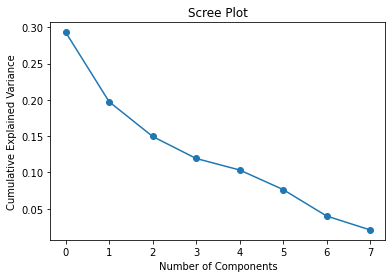

Scree plot 확인 결과, 주성분이 3개일 때 elbow가 관측된다.


In [75]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()
print('Scree plot 확인 결과, 주성분이 3개일 때 elbow가 관측된다.')

In [76]:
pca = PCA(n_components=3)                    
x_train_pc = pd.DataFrame(data=pca.fit_transform(x_train_scaled), columns =['pc1', 'pc2', 'pc3']) 

In [77]:
x_test_pc = pd.DataFrame(data=pca.transform(x_test_scaled), columns =['pc1', 'pc2', 'pc3']) 

In [78]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train_pc, y_train)
print(Counter(y_smote))

Counter({0: 378, 1: 378})


In [79]:
rf = RandomForestClassifier()
svc = SVC()
lr = LogisticRegression()

model_list = [rf, svc, lr]
for model in model_list:
    print(model.__class__())
    start = time.time() # 시작
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    print('Train report')
    print(classification_report(model.predict(x_train), y_train))
    print('Test scores')
    print(f'Accuracy: {accuracy_score(pred, y_test)}')
    print(f'F1: {f1_score(pred, y_test)}')
    print(classification_report(pred, y_test))
    sec = time.time() - start # 종료 - 시작 (걸린 시간)
 
    times = str(datetime.timedelta(seconds=sec)) # 걸린 시간 보기좋게 바꾸기
    short = times.split(".")[0] # 초 단위 까지만
    print(f"{times} sec")
    print(f"{short} sec")
    print()

RandomForestClassifier()
Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       199

    accuracy                           1.00       577
   macro avg       1.00      1.00      1.00       577
weighted avg       1.00      1.00      1.00       577

Test scores
Accuracy: 0.7310344827586207
F1: 0.5806451612903226
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       102
           1       0.54      0.63      0.58        43

    accuracy                           0.73       145
   macro avg       0.69      0.70      0.69       145
weighted avg       0.75      0.73      0.74       145

0:00:00.277828 sec
0:00:00 sec

SVC()
Train report
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       464
           1       0.43      0.76      0.55       113

    accuracy                 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
print('Random Forest 모델의 성능이 test 정확도 0.73, F1 0.58로 소폭 감소하였고, Logistic Regression도 test 정확도 0.70 F1 0.61에서 0.73, 0.54로 변경되었다.')
print('Logistic 회귀의 경우 정확도가 소폭 상승했으나, 본 분석은 클래스 불균형이 있는 데이터이므로 F1 score의 감소에 초점을 맞추는 것이 타당하다.')
print('반면, 수행 속도는 Random Forest가 0.29에서 0.28로, Logistic Regression이 0.06초에서 0.05초로 소폭 감소하였다.')
print('지금은 데이터의 사이즈가 작아 큰 차이를 보이지 않지만, 사이즈를 키워서 학습을 진행할 경우 차원 축소의 학습 속도 증가 효과는 커진다.')

Random Forest 모델의 성능이 test 정확도 0.73, F1 0.58로 소폭 감소하였고, Logistic Regression도 test 정확도 0.70 F1 0.61에서 0.73, 0.54로 변경되었다.
Logistic 회귀의 경우 정확도가 소폭 상승했으나, 본 분석은 클래스 불균형이 있는 데이터이므로 F1 score의 감소에 초점을 맞추는 것이 타당하다.
반면, 수행 속도는 Random Forest가 0.29에서 0.28로, Logistic Regression이 0.06초에서 0.05초로 소폭 감소하였다.
지금은 데이터의 사이즈가 작아 큰 차이를 보이지 않지만, 사이즈를 키워서 학습을 진행할 경우 차원 축소의 학습 속도 증가 효과는 커진다.


## 회사는 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속함유량이 차이가 난다고 제보를 받았다. 해당 금속함유량 데이터에 대한 검정을 수행하시오. (유의확률:0.05)

In [6]:
## 데이터 불러오기 
df = pd.read_csv('./ADP_book_ver01/data/metalicity')
df

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529
...,...
145,45.915727
146,45.277868
147,45.082157
148,44.297235


### 연구가설과 귀무가설을 작성시오

In [3]:
print('H0: 제품의 금속 재질 함유량의 분산은 1.3이다.')
print('H1: 제품의 금속 재질 함유량의 분산은 1.3이 아니다.')

H0: 제품의 금속 재질 함유량의 분산은 1.3이다.
H1: 제품의 금속 재질 함유량의 분산은 1.3이 아니다.


### 가설을 양측 검정

In [7]:
print('분산에 대한 카이제곱 검정을 진행하기 전에, 카이제곱 검정의 가정인 정규성을 shapiro-wilk test로 확인한다.')
print('H0: 데이터가 정규성을 따른다.')
print('H1: 데이터가 정규성을 따르지 않는다.')
stats.shapiro(df)

분산에 대한 카이제곱 검정을 진행하기 전에, 카이제곱 검정의 가정인 정규성을 shapiro-wilk test로 확인한다.
H0: 데이터가 정규성을 따른다.
H1: 데이터가 정규성을 따르지 않는다.


ShapiroResult(statistic=0.9822470545768738, pvalue=0.050023749470710754)

In [8]:
print('검정통계량 0.98, p-value 0.050으로 귀무가설을 기각하지 않는다. 즉, 데이터는 정규성을 따른다고 판단할 수 있다.')

검정통계량 0.98, p-value 0.050으로 귀무가설을 기각하지 않는다. 즉, 데이터는 정규성을 따른다고 판단할 수 있다.


In [9]:
def chi_var_test(x, va0, direction="two-tailed"):
    n = len(x)
    chi_stat = (n - 1) * np.var(x) / va0 
    tmp_p = stats.chi2.cdf(chi_stat, df=n-1)
    
    if direction == "lower":
        p = tmp_p
    elif direction == "upper":
        p = 1 - tmp_p 
    else:
        p = 2*(1-tmp_p) if tmp_p > 0.5 else 2*tmp_p
    
    return chi_stat, p

chi_var_test(df, va0=1.3)

(metalicity    84.614385
 dtype: float64,
 array([9.71273026e-06]))

### 검정통계량, 가설 채택

In [10]:
print('분산에 대한 카이제곱 검정 결과, 검정통계량 84.61, p-value 0.000으로 귀무가설을 기각한다.그러므로, 제품의 금속 재질 함유량 분산은 1.3이 아니라고 판단할 통계적 근거가 충분하다.')

분산에 대한 카이제곱 검정 결과, 검정통계량 84.61, p-value 0.000으로 귀무가설을 기각한다.그러므로, 제품의 금속 재질 함유량 분산은 1.3이 아니라고 판단할 통계적 근거가 충분하다.


## 200개의 Lot별 불량 제품 수량 데이터에 따라 아래의 값을 구하시오. <br>
- p관리도 : 전체품목의 표본에서 부적합 부품의 수의 비율 
2.1 p관리도에 따라 관리중심선(center line), 관리 상한선, 하한선 구하시오<br>
2.2 관리도 시각화 하시오<br>

In [12]:
df2 = pd.read_csv('./ADP_book_ver01/data/lot_quality.csv')
df2 = df2.set_index('lot')
df2

,생산수량,불량수량
lot,,
1,587,19
2,588,15
3,455,19
4,666,12
5,750,15
...,...,...
196,631,18
197,565,21
198,570,12


In [16]:
df2['ratio'] = df2['불량수량']/df2['생산수량']

In [18]:
center = df2['ratio'].mean()

In [214]:
df2['lower'] = df2["불량수량"]/df2["생산수량"] - 3*np.sqrt(center*(1-center)/df2["생산수량"])
df2['upper'] = df2["불량수량"]/df2["생산수량"] + 3*np.sqrt(center*(1-center)/df2["생산수량"])

df2['lower'] = np.where(df2['lower'] > 0, df2['lower'], 0)

lower = df2['lower'].mean()
upper = df2['upper'].mean()

In [215]:
print(f'p관리도의 관리중심선은 {center}, 상한선 평균은 {upper}, 하한선 평균은 {lower} 이다.')

p관리도의 관리중심선은 0.029852193187603505, 상한선 평균은 0.050927816481343334, 하한선 평균은 0.0092594970626662 이다.


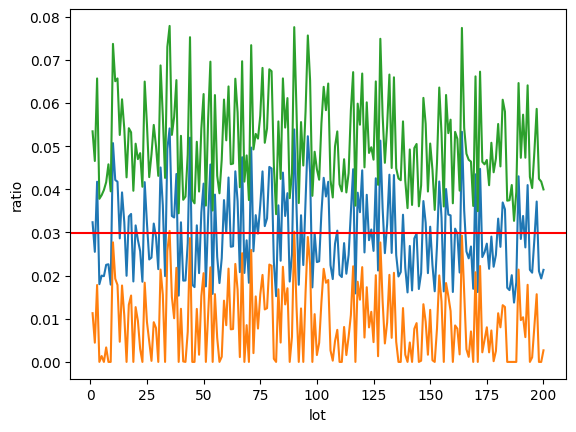

In [216]:
sns.lineplot(x=df2.index, y='ratio', data=df2)
sns.lineplot(x=df2.index, y='lower', data=df2)
sns.lineplot(x=df2.index, y='upper', data=df2)
plt.axhline(center, color='red')


### 3.표에 제품 1, 2를 만드는데 재료 a, b, c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품2의 개수를 구하라.
재료 공급량 { a: 1300, b: 1000, c:1200 }(10점)


In [74]:
### 제품 2의 개수 -> 0 ~ 32개
total_cost = [1300, 1000, 1200]
benefit_dict = dict()
for i in range(33):
    cost = total_cost.copy()

    pro_2_count = i
    pro_2_cost = [i * 40, i * 30, i * 30]
    for i in range(len(cost)): # 제품 2를 만드는 비용 제거
        cost[i] -= pro_2_cost[i]

    pro_1_count = min(cost)//20
    benefit_dict[f'{pro_1_count}:{pro_2_count}'] = (12 * pro_1_count) + (18 * pro_2_count)

In [73]:
print('최대 수익은 600만원이며, 이 때의 제품 1과 제품 2의 순서쌍은 여러 개가 있다. 제품 2를 30개 이하의 짝수로 만들고, 나머지 비용으로 제품 1을 만들면 된다.')
print('그 리스트는 아래와 같다.')
for k, v in benefit_dict.items():
    if v==600:
        print(f"제품 1 {k.split(':')[0]}개, 제품 2 {k.split(':')[1]}개")

최대 수익은 600만원이며, 이 때의 제품 1과 제품 2의 순서쌍은 여러 개가 있다. 제품 2를 30개 이하의 짝수로 만들고, 나머지 비용으로 제품 1을 만들면 된다.
그 리스트는 아래와 같다.
제품 1 50개, 제품 2 0개
제품 1 47개, 제품 2 2개
제품 1 44개, 제품 2 4개
제품 1 41개, 제품 2 6개
제품 1 38개, 제품 2 8개
제품 1 35개, 제품 2 10개
제품 1 32개, 제품 2 12개
제품 1 29개, 제품 2 14개
제품 1 26개, 제품 2 16개
제품 1 23개, 제품 2 18개
제품 1 20개, 제품 2 20개
제품 1 17개, 제품 2 22개
제품 1 14개, 제품 2 24개
제품 1 11개, 제품 2 26개
제품 1 8개, 제품 2 28개
제품 1 5개, 제품 2 30개



### 4.상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 함. ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']<br>
4.1 구매하는 패턴으로 봐서 두 상품이 연관이 있는지 가설 세우고 검정하시오<br>
4.2 연구가설 귀무가설 세우시오<br>
4.3 가설 채택하시오

In [77]:
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']

test_df = pd.DataFrame(data, columns=["product"])
test_df.head()

,product
0,a
1,a
2,b
3,b
4,a


In [82]:
print('H0: 두 상품 a, b의 구매 패턴은 무작위이다.')
print('H1: 두 상품 a, b의 구매 패턴에는 연관성이 있다.')
print('상품의 무작위성을 판단하기 위해, one sample run test를 수행한다.')

H0: 두 상품 a, b의 구매 패턴은 무작위이다.
H1: 두 상품 a, b의 구매 패턴에는 연관성이 있다.
상품의 무작위성을 판단하기 위해, one sample run test를 수행한다.


In [80]:
from statsmodels.sandbox.stats.runs import runstest_1samp

In [81]:
# Run-test를 위한 데이터 변환 
test_df.loc[test_df['product']=='a', 'product']=1
test_df.loc[test_df['product']=='b', 'product']=0

# Perform Runs test
runstest_1samp(test_df['product'], cutoff=0.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

In [83]:
print('Run test 결과, 검정통계량 -1.12, p-value 0.27로 유의수준 0.05 하에서 귀무가설을 기각할 수 없다. 그러므로, 두 상품의 구매 패턴의 연관성이 있다고 볼 통계적 근거가 부족하다.')

Run test 결과, 검정통계량 -1.12, p-value 0.27로 유의수준 0.05 하에서 귀무가설을 기각할 수 없다. 그러므로, 두 상품의 구매 패턴의 연관성이 있다고 볼 통계적 근거가 부족하다.
